In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

/home/w_lander/anaconda3/envs/dowgrade/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Работа с данными. Домашнее задание


## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [2]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Genre                   181 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

CustomerID                 0
Genre                     19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64

In [5]:
(df.isnull().sum() / df.shape[0])

CustomerID                0.000
Genre                     0.095
Age                       0.100
Annual Income (k$)        0.100
Spending Score (1-100)    0.000
dtype: float64

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [6]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=1)

### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [7]:
X_train[X_train['Genre'].isna()]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
56,57,NaN,51.0,44.0,50
185,186,NaN,30.0,99.0,97
123,124,NaN,39.0,NaN,91
106,107,NaN,NaN,63.0,50
199,200,NaN,30.0,137.0,83
54,55,NaN,50.0,NaN,45
84,85,NaN,21.0,54.0,57
154,155,NaN,47.0,78.0,16
6,7,NaN,135.0,18.0,6
32,33,NaN,53.0,33.0,4


In [8]:
X_train.loc[[57, 186]]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
57,58,NaN,69.0,44.0,46
186,187,Female,54.0,NaN,24


In [9]:
# Для полей 'Age', 'Annual Income (k$)' пропуски заполним медианой, т.к она менее подвержена быбросам
imp_median = SimpleImputer(strategy='median')

med_cols = ['Age', 'Annual Income (k$)']

X_train[med_cols] = imp_median.fit_transform(X_train[med_cols])

In [10]:
# Для полей 'Genre' пропуски заполним самым частотным значением (модой)
imp_mode = SimpleImputer(strategy='most_frequent')

mode_cols = ['Genre']

X_train[mode_cols] = imp_mode.fit_transform(X_train[mode_cols])

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160 entries, 108 to 37
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              160 non-null    int64  
 1   Genre                   160 non-null    object 
 2   Age                     160 non-null    float64
 3   Annual Income (k$)      160 non-null    float64
 4   Spending Score (1-100)  160 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 11.6+ KB


In [12]:
X_train['Age'] = X_train['Age'].astype('int64')

### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


In [13]:
### YOUR CODE HERE ###
X_train.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,160.000000,160.000000,160.000000,160.00000
mean,101.337500,39.562500,6309.768750,51.35625
std,56.429606,16.854049,79052.190219,26.08895
min,1.000000,18.000000,15.000000,1.00000
25%,55.750000,30.000000,46.750000,35.75000
50%,104.500000,37.000000,62.000000,51.00000
75%,147.250000,48.000000,75.000000,73.00000
max,200.000000,135.000000,1000000.000000,98.00000


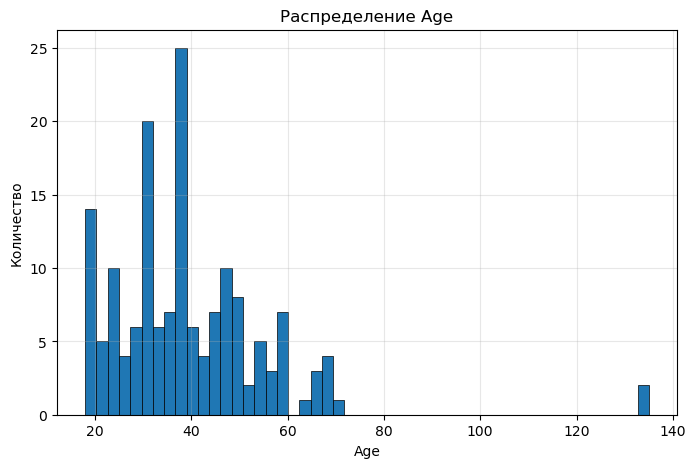

In [14]:
plt.figure(figsize=(8,5))

X_train['Age'].hist(density=False, bins=50, linewidth=0.5, edgecolor='k')
plt.title('Распределение Age')
plt.ylabel('Количество')
plt.xlabel('Age')
plt.grid(alpha=0.3)

In [15]:
# в признаке Age есть выбросы люди старше 120 лет, удилим эти признаки
#df_iris = df_iris.drop(df_iris[df_iris['target'] == 2].index)

In [16]:
X_train[X_train['Age'] > 100]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
6,7,Female,135,18.0,6
8,9,Male,135,19.0,3


In [17]:
X_train = X_train.drop(X_train[X_train['Age'] > 100].index)

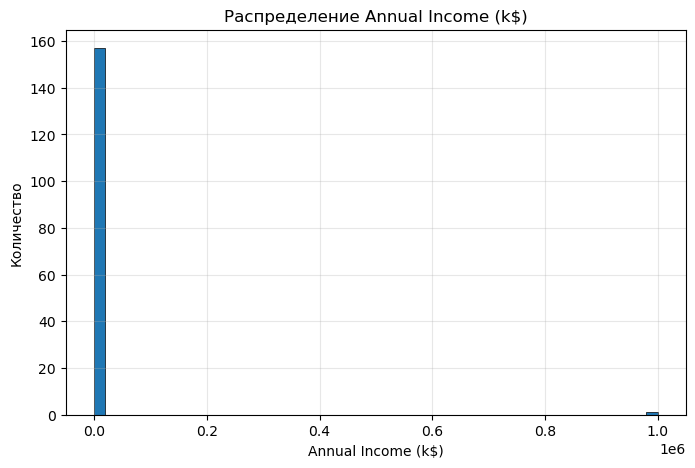

In [18]:
plt.figure(figsize=(8,5))

X_train['Annual Income (k$)'].hist(density=False, bins=50, linewidth=0.5, edgecolor='k')
plt.title('Распределение Annual Income (k$)')
plt.ylabel('Количество')
plt.xlabel('Annual Income (k$)')
plt.grid(alpha=0.3)

In [19]:
# в признаке Annual Income (k$) есть выбросы человек с доходом 1000000 тыс.

In [20]:
X_train = X_train.drop(X_train[X_train['Annual Income (k$)'] == 1000000].index)

### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

In [21]:
### YOUR CODE HERE ###
category_col = ['Genre']

ohe = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
ft = ohe.fit_transform(X_train[category_col])

df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
df_ft.head()

,Genre_Female,Genre_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


In [22]:
X_train.reset_index(drop=True, inplace=True)

In [23]:
X_train = pd.concat([X_train, df_ft], axis=1)
X_train.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,109,Male,68,63.0,43,0.0,1.0
1,108,Male,54,63.0,46,0.0,1.0
2,190,Female,36,103.0,85,1.0,0.0
3,15,Male,37,20.0,13,0.0,1.0
4,57,Female,51,44.0,50,1.0,0.0


### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [24]:
# Нормализем признаки MinMaxScaler
numeric_col = ['Age', 'Annual Income (k$)']

mm_scaler = MinMaxScaler().fit_transform(X_train[numeric_col])

df_mmsc = pd.DataFrame(mm_scaler, columns=['Age_mm', 'Annual Income (k$)_mm']) 
df_mmsc.head()


,Age_mm,Annual Income (k$)_mm
0,0.961538,0.393443
1,0.692308,0.393443
2,0.346154,0.721311
3,0.365385,0.040984
4,0.634615,0.237705


In [25]:
X_train = pd.concat([X_train, df_mmsc], axis=1)
X_train.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,Age_mm,Annual Income (k$)_mm
0,109,Male,68,63.0,43,0.0,1.0,0.961538,0.393443
1,108,Male,54,63.0,46,0.0,1.0,0.692308,0.393443
2,190,Female,36,103.0,85,1.0,0.0,0.346154,0.721311
3,15,Male,37,20.0,13,0.0,1.0,0.365385,0.040984
4,57,Female,51,44.0,50,1.0,0.0,0.634615,0.237705


In [26]:
X_train.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Genre_Female', 'Genre_Male', 'Age_mm',
       'Annual Income (k$)_mm'],
      dtype='object')

In [27]:
# Удаляем ненужные столбцы
X_train.drop(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)'], axis=1, inplace=True)

### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [28]:
# Заполним пропуски
X_test[mode_cols] = imp_mode.fit_transform(X_test[mode_cols])
X_test[med_cols] = imp_median.fit_transform(X_test[med_cols])

In [29]:
X_test.reset_index(drop=True, inplace=True)

In [30]:
# Кодируем признаки
ft = ohe.fit_transform(X_test[category_col])

df_ft = pd.DataFrame(ft, columns=ohe.get_feature_names_out())
X_test = pd.concat([X_test, df_ft], axis=1)

In [31]:
# Нормализуем признаки
mm_scaler = MinMaxScaler().fit_transform(X_test[numeric_col])

df_mmsc = pd.DataFrame(mm_scaler, columns=['Age_mm', 'Annual Income (k$)_mm']) 
X_test = pd.concat([X_test, df_mmsc], axis=1)

In [32]:
# Удаляем ненужные столбцы
X_test.drop(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)'], axis=1, inplace=True)

In [33]:
X_test.head()

,Spending Score (1-100),Genre_Female,Genre_Male,Age_mm,Annual Income (k$)_mm
0,51,1.0,0.0,0.130435,0.241667
1,35,1.0,0.0,0.956522,0.175000
2,14,0.0,0.0,0.608696,0.133333
3,59,0.0,1.0,1.000000,0.375000
4,39,1.0,0.0,0.434783,0.683333


In [34]:
X_train.head()

,Spending Score (1-100),Genre_Female,Genre_Male,Age_mm,Annual Income (k$)_mm
0,43,0.0,1.0,0.961538,0.393443
1,46,0.0,1.0,0.692308,0.393443
2,85,1.0,0.0,0.346154,0.721311
3,13,0.0,1.0,0.365385,0.040984
4,50,1.0,0.0,0.634615,0.237705


In [35]:
# Сохраняем обработанные датасеты
X_train.to_csv('data/X_train.csv', index=False, encoding='utf8')
X_test.to_csv('data/X_test.csv', index=False, encoding='utf8')